In [1]:
from __future__ import division

from itertools import permutations

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from networkx.exception import NetworkXNoPath
import Selection_Algorithm

In [2]:
def graph():    
    import graph
    Graph = graph.H
    return Graph
G = graph()

In [24]:
def eff():
    i=0
    eff_list=[]
    nodes =  G.nodes
    if nodes!= 0:
        
        #H = nx.karate_club_graph()
        for i in G:  
            H = G.copy()
            ebunch =list(Selection_Algorithm.subgraph_of(i).edges)
            H.remove_edges_from(ebunch)
            #H.remove_node(i)
            efficiency = nx.global_efficiency(H)
            density = nx.density(H)
            EF = (i, efficiency, density)       
            eff_list.append(EF)
            
    return  eff_list

In [25]:
eff_table = pd.DataFrame(eff(), columns = ('nodes','Efficiency','Density'))
eff_table.index = eff_table.index + 1
eff_table.nodes = eff_table.nodes + 1
print(eff_table)

    nodes  Efficiency   Density
1       1    0.262686  0.081996
2       2    0.377807  0.103387
3       3    0.416399  0.106952
4       4    0.392365  0.110517
5       5    0.453149  0.130125
6       6    0.434254  0.126560
7       7    0.434254  0.126560
8       8    0.443108  0.121212
9       9    0.440137  0.121212
10     10    0.492008  0.139037
11     11    0.453149  0.130125
12     12    0.492008  0.139037
13     13    0.464082  0.133690
14     14    0.461408  0.121212
15     15    0.465508  0.133690
16     16    0.465508  0.133690
17     17    0.471331  0.133690
18     18    0.463785  0.133690
19     19    0.465508  0.133690
20     20    0.481818  0.133690
21     21    0.465508  0.133690
22     22    0.463785  0.133690
23     23    0.465508  0.133690
24     24    0.466904  0.124777
25     25    0.483036  0.133690
26     26    0.483036  0.133690
27     27    0.465062  0.133690
28     28    0.484730  0.133690
29     29    0.484284  0.133690
30     30    0.434997  0.124777
31     3

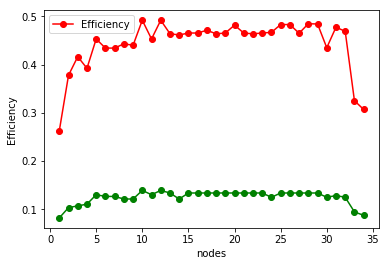

In [26]:
plt.plot(eff_table.Efficiency, 'r-o')
plt.plot(eff_table.Density, 'g-o')
plt.legend(["Efficiency"])
plt.xlabel("nodes")
plt.ylabel("Efficiency")
plt.savefig("result/eff1.png")
plt.show()

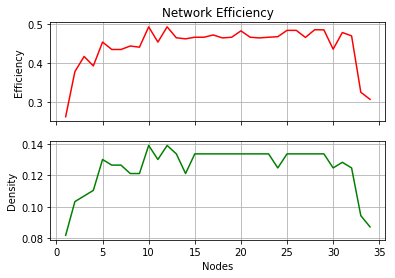

In [27]:
# Create two subplots sharing y axis
fig, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(eff_table.nodes,eff_table.Efficiency, 'r')
ax1.set(title='Network Efficiency', ylabel='Efficiency')
ax1.grid()
ax2.grid()

ax2.plot(eff_table.nodes, eff_table.Density, 'g')
ax2.set(xlabel='Nodes', ylabel='Density')
plt.savefig("result/eff2.png")
plt.show()